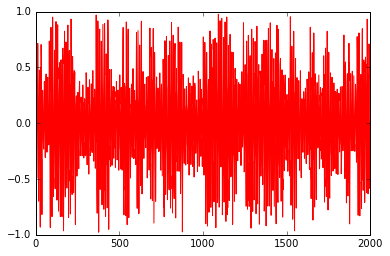

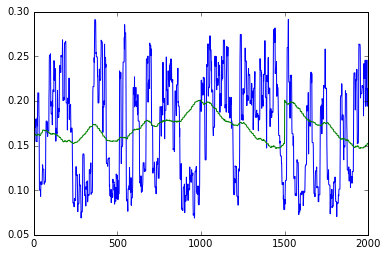

In [11]:
import numpy as np 
import matplotlib.pyplot as plt
import random
%matplotlib inline

sampleRate = 10
freqDiv = 4
bigCap = 500
smallCap = 10

# carrier signal
freq = 200
x = np.linspace(0, 2 * np.pi * freq , sampleRate*freq )
y = np.sin(x) 

# add noise to the signal
for g in range(len(y)):
    y[g] = y[g] * random.uniform(0.3, 1.0)
    pass
# backscatter signal 
dig = []
for i in range(freq/freqDiv):
    if random.random() > 0.5:
        dig += [1]* sampleRate*freqDiv
    else:
        dig += [0.5]* sampleRate*freqDiv 

# superimpose the backscatter on the carrier wave
y = y *  np.array(dig)
        
plt.plot(y, 'r-')


##### Backscatter Decoding 

# envlope detection 
env = []
largeEnv = []

#diode
y[ y < 0] = 0   

# small capacitor 
for i in range( (len(y)-smallCap) ):
    env.append(np.mean( y[i:smallCap+i] ) )
    
# large capacitor
for j in range( (len(y)-bigCap) ):
    largeEnv.append(np.mean( y[j:bigCap+j] ) )
 
env+=(env[-smallCap:])
largeEnv+=largeEnv[-bigCap:]

plt.figure()
plt.plot(env)
plt.plot(largeEnv)
    

In [24]:
print env

[]
